In [1]:
import pandas as pd
import numpy as np

In [6]:
# read csv
import os

path = r'C:\Users\Dael\Downloads\data_preprocessing\data_preprocessing-main\datasets'
cfile = 'StudentsPerformance.csv'
fullpath = os.path.join(path, cfile) 

df_excel = pd.read_csv(fullpath)
df_excel.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Sum, Average, Max, Min, Count

## Columns

In [7]:
# first look
df_excel.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
# calculate specific columns
# suma o memdia o contar, o max o min por columnas 

# df_excel['math score'].sum()
df_excel['math score'].mean()
# df_excel['math score'].max()
# df_excel['math score'].min()
# df_excel['math score'].count()

66.089

# Rows

In [10]:
# suma porr filas solo de datos numericos
df_excel.sum(axis=1)

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_9776/1622049552.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_excel.sum(axis=1)


0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Length: 1000, dtype: int64

**creando una columna nueva llamada average la cual calcula los promedio por fila de las columnas numericas**

In [11]:
df_excel['average'] = (df_excel['math score'] + df_excel['reading score'] + df_excel['writing score'])/3
# df_excel.mean(axis=1)
df_excel.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


**contando valores de una columna**

In [6]:
# count
df_excel['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

# IF

In [13]:
# if condition
df_excel['pass/fail'] = np.where(df_excel['average'] > 70, 'Pass', 'Fail')
df_excel.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,pass/fail
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Pass
1,female,group C,some college,standard,completed,69,90,88,82.333333,Pass
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Fail
4,male,group C,some college,standard,none,76,78,75,76.333333,Pass


In [14]:
# multiple conditions
conditions = [
    (df_excel['average']>=90),
    (df_excel['average']>=80) & (df_excel['average']<90), # condicion "Y" promedio mayor 80 y menor 90
    (df_excel['average']>=70) & (df_excel['average']<80), # condicion "Y" promedio mayor 70 y menor 80
    (df_excel['average']>=60) & (df_excel['average']<70), # condicion "Y" promedio mayor 60 y menor 70
    (df_excel['average']>=50) & (df_excel['average']<60), # condicion "Y" promedio mayor 50 y menor 60
    (df_excel['average']<50),
]

values = ['A', 'B', 'C', 'D', 'E', 'F']

In [15]:
df_excel['grades'] = np.select(conditions, values)
df_excel.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,pass/fail,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Pass,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,Pass,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Fail,F
4,male,group C,some college,standard,none,76,78,75,76.333333,Pass,C


In [16]:
# show first 5 rows
df_excel[['average', 'pass/fail', 'grades']].head()

,average,pass/fail,grades
0,72.666667,Pass,C
1,82.333333,Pass,B
2,92.666667,Pass,A
3,49.333333,Fail,F
4,76.333333,Pass,C


# SumIf, CountIf, AverageIf

## One condition (select a column with brackets [ ] )

In [18]:
# desglosando el codigo
df_excel[df_excel['gender'] == 'female']

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,pass/fail,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Pass,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,Pass,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass,A
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,Pass,C
6,female,group B,some college,standard,completed,88,95,92,91.666667,Pass,A
...,...,...,...,...,...,...,...,...,...,...,...
993,female,group D,bachelor's degree,free/reduced,none,62,72,74,69.333333,Fail,D
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,Pass,A
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,Fail,D
998,female,group D,some college,standard,completed,68,78,77,74.333333,Pass,C


In [20]:
df_excel[df_excel['gender'] == 'female'].count()

gender                         518
race/ethnicity                 518
parental level of education    518
lunch                          518
test preparation course        518
math score                     518
reading score                  518
writing score                  518
average                        518
pass/fail                      518
grades                         518
dtype: int64

In [21]:
# only sum scores for the female gender
df_female = df_excel[df_excel['gender'] == 'female']

# creando una columna average solo para el genero femino
# creating an average column for the female gender only
# df_female['average'] = df_female.mean(axis=1)

# columna suma solo para el genero femenino
# column adds up only for the female gender
# df_female['sum'] = df_female.sum(axis=1)


## Two or more conditions (select columns and use & or |)

In [22]:
# solo obtener el promedio para el genero femenino y grupo B
# only obtain the average for the female gender and group B
# funcion assign() asigna una nueva columna llamada sumifs 

df_sumifs = df_excel[(df_excel['gender'] == 'female') & (df_excel['race/ethnicity'] == 'group B')]
df_sumifs = df_sumifs.assign(sumifs = df_sumifs['math score'] + df_sumifs['reading score'] + df_sumifs['writing score'])
df_sumifs


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,pass/fail,grades,sumifs
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Pass,C,218
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass,A,278
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,Pass,C,232
6,female,group B,some college,standard,completed,88,95,92,91.666667,Pass,A,275
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,Fail,F,148
...,...,...,...,...,...,...,...,...,...,...,...,...
923,female,group B,associate's degree,free/reduced,none,54,65,65,61.333333,Fail,D,184
944,female,group B,high school,standard,none,58,68,61,62.333333,Fail,D,187
969,female,group B,bachelor's degree,standard,none,75,84,80,79.666667,Pass,C,239
980,female,group B,high school,free/reduced,none,8,24,23,18.333333,Fail,F,55


# Basic Data Cleaning

## Change the case of text with .str.lower, .str.upper or .str.title

In [23]:
# df_excel['gender'].str.title()
# df_excel['gender'].str.upper()
df_excel['gender'].str.title()

0      Female
1      Female
2      Female
3        Male
4        Male
        ...  
995    Female
996      Male
997    Female
998    Female
999    Female
Name: gender, Length: 1000, dtype: object

## Extract text in a column with .str.extract

In [24]:
df_excel.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,pass/fail,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Pass,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,Pass,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Fail,F
4,male,group C,some college,standard,none,76,78,75,76.333333,Pass,C


# Expresion Regulares

In [25]:
df_excel['race/ethnicity'].str.extract(r'([A-Z])') # expresion regular para letras mayusculas

,0
0,B
1,C
2,B
3,A
4,C
...,...
995,E
996,C
997,C
998,D


## Identify whether a cell is empty with the .isnull method

In [26]:
# there's no empty rows in the dataframe
df_excel[df_excel['gender'].isnull()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,pass/fail,grades


# Vlookup

For this example, we'll use 2 CSV files "StudentsPerformance.csv" and "LanguageScore.csv"

In [27]:
# reading the files
import os
path = r'C:\Users\Dael\Downloads\data_preprocessing\data_preprocessing-main\datasets'
excel_1 = 'StudentsPerformance.csv'
excel_2 = 'LanguageScore.csv'
fullpath_excel_1 = os.path.join(path, excel_1)
fullpath_excel_2 = os.path.join(path, excel_2)

df_excel_1 = pd.read_csv(fullpath_excel_1)
df_excel_2 = pd.read_csv(fullpath_excel_2)


In [49]:
df_excel_2

,id,language score
0,1,74
1,2,67
2,3,34
3,4,33
4,5,75
...,...,...
95,96,67
96,97,87
97,98,66
98,99,94


In [44]:
# creating id column from index (just as an example)

# esto se crea para conetar las dos tablas como si fuera buscar v
# this is created to connect the two tables as if it were V lookup

df_excel_1 = df_excel_1.reset_index()
df_excel_1 = df_excel_1.rename(columns={'index':'id'})  # renombrar el nombre index por id


In [42]:
# en caso de duplicar columnas, en este caso borrar columna duplicada de id
# df_excel_1.drop('id', axis=1, inplace=True)


In [45]:
df_excel_1.head()

,id,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75


## Find an element with .loc[ ]

In [33]:
df_excel_1.loc[0, 'math score'] # fila 0 en columan math score

72

In [46]:
df_excel_1.loc[df_excel_1['id'] == 0 , 'math score']

0    72
Name: math score, dtype: int64

In [19]:
df_excel_1.loc[100, ]

id                                      100
gender                                 male
race/ethnicity                      group B
parental level of education    some college
lunch                              standard
test preparation course                none
math score                               79
reading score                            67
writing score                            67
Name: 100, dtype: object

In [47]:
df_excel_1.loc[df_excel_1['id']==100, 'math score']

100    79
Name: math score, dtype: int64

## Merge two tables with pd.merge or pd.concat

In [54]:
#merge
df_excel_merge = pd.merge(df_excel_1, df_excel_2, on='id', how='left')
df_excel_merge['language score'].fillna('null', inplace=True)
df_excel_merge.head(10)

,id,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,language score
0,0,female,group B,bachelor's degree,standard,none,72,72,74,null
1,1,female,group C,some college,standard,completed,69,90,88,74.0
2,2,female,group B,master's degree,standard,none,90,95,93,67.0
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,34.0
4,4,male,group C,some college,standard,none,76,78,75,33.0
5,5,female,group B,associate's degree,standard,none,71,83,78,75.0
6,6,female,group B,some college,standard,completed,88,95,92,51.0
7,7,male,group B,some college,free/reduced,none,40,43,39,95.0
8,8,male,group D,high school,free/reduced,completed,64,64,67,92.0
9,9,female,group B,high school,free/reduced,none,38,60,50,56.0


In [52]:
#concat
df_excel_concat = pd.concat(
    [df_excel_1.set_index('id'), df_excel_2.set_index('id')], axis=1 # concatenacion verticalmente
)
df_excel_concat['language score'].fillna(' ', inplace=True)
df_excel_concat


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,language score
id,,,,,,,,,
0,female,group B,bachelor's degree,standard,none,72,72,74,
1,female,group C,some college,standard,completed,69,90,88,74.0
2,female,group B,master's degree,standard,none,90,95,93,67.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,34.0
4,male,group C,some college,standard,none,76,78,75,33.0
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,
996,male,group C,high school,free/reduced,none,62,55,55,
997,female,group C,high school,free/reduced,completed,59,71,65,


# Pivot Table

## Use the .pivot_table method

In [55]:
df_excel.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,pass/fail,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Pass,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,Pass,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Fail,F
4,male,group C,some college,standard,none,76,78,75,76.333333,Pass,C


In [56]:
df_pivot = df_excel.pivot_table(index='race/ethnicity', values=['math score', 'writing score'], aggfunc='mean')
df_pivot

,math score,writing score
race/ethnicity,,
group A,61.629213,62.674157
group B,63.452632,65.600000
group C,64.463950,67.827586
group D,67.362595,70.145038
group E,73.821429,71.407143


# Replace Excel Graphs with Python's Matplotlib or Seaborn

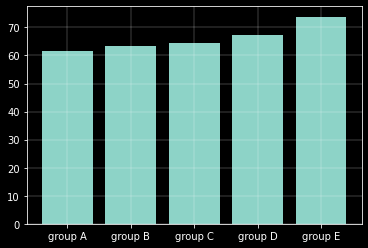

In [59]:
import matplotlib.pyplot as plt

df_plot = df_pivot.reset_index()
plt.bar(df_plot['race/ethnicity'], df_plot['math score'])
plt.style.use('dark_background')
plt.grid(lw=0.25)
plt.show()


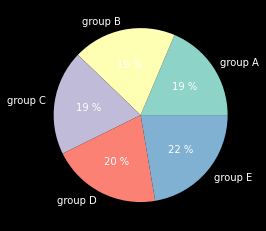

In [60]:
plt.pie(df_plot['math score'], labels=df_plot['race/ethnicity'], autopct='%.0f %%')
plt.show()